In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
c_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# First 5 rows in dataframe
c_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
c_data.shape

(200, 5)

In [ ]:
# chking Missing values
c_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
x = c_data.iloc[:,[3,4]].values

In [ ]:
print(x)

In [ ]:
# Finding wcss value (Number of clusters that should be there)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
# Elbow Graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Number of cluster = 5

In [ ]:
# training the K-Means clustering model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)

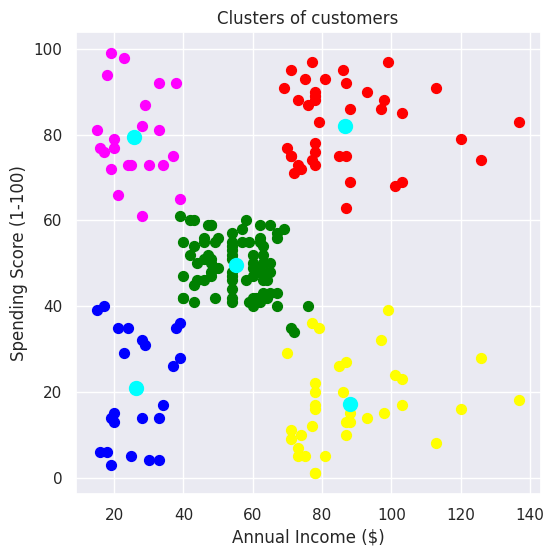

In [ ]:
# Plotting the clusters with centroids
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s=50,c='magenta',label='Cluster 5')
# Cenroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()


